In [97]:
import pandas as pd

stats = pd.read_csv("baseball.csv")
stats

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [98]:
#Dropping columns that aren't needed 
stats.drop('RS', axis=1, inplace=True)
stats.drop('RA', axis=1, inplace=True)
stats.drop('W', axis=1, inplace=True)
stats.drop('RankSeason', axis=1, inplace=True)
stats.drop('RankPlayoffs', axis=1, inplace=True)
stats.drop('OOBP', axis=1, inplace=True)
stats.drop('OSLG', axis=1, inplace=True)
stats

,Team,League,Year,OBP,SLG,BA,Playoffs,G
0,ARI,NL,2012,0.328,0.418,0.259,0,162
1,ATL,NL,2012,0.320,0.389,0.247,1,162
2,BAL,AL,2012,0.311,0.417,0.247,1,162
3,BOS,AL,2012,0.315,0.415,0.260,0,162
4,CHC,NL,2012,0.302,0.378,0.240,0,162
...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,0.330,0.390,0.260,0,161
1228,PIT,NL,1962,0.321,0.394,0.268,0,161
1229,SFG,NL,1962,0.341,0.441,0.278,1,165
1230,STL,NL,1962,0.335,0.394,0.271,0,163


In [99]:
#Splitting data into train validate and test catagories 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt



X = stats[['OBP','SLG','BA']]
y = stats['Playoffs']

# Split the dataset into training+validation and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


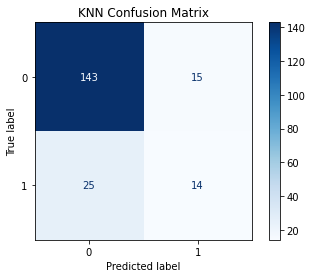

KNN Accuracy: 0.7969543147208121


In [100]:
# 4. Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5) 

# 5. Fit the model on the training data
knn.fit(X_train, y_train)

# 6. Make predictions on the test data
y_val_pred1 = knn.predict(X_val)
val_accuracy1 = accuracy_score(y_val, y_val_pred1)

conf_matrix1 = confusion_matrix(y_val, y_val_pred1)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1)
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()
print('KNN Accuracy:',val_accuracy1)

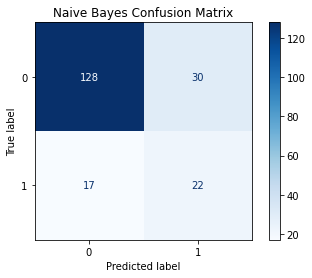

Naive Bayes Accuracy: 0.7614213197969543


In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_val_pred2 = gnb.predict(X_val)
val_accuracy2 = accuracy_score(y_val, y_val_pred2)

conf_matrix2 = confusion_matrix(y_val, y_val_pred2)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2)
disp.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

print('Naive Bayes Accuracy:',val_accuracy2)

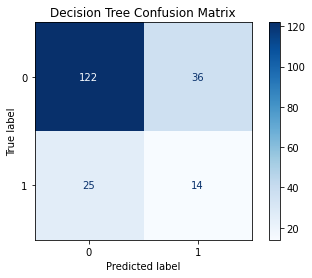

Decision Tree Accuracy: 0.6903553299492385


In [102]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Create a Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the classifier
dtc.fit(X_train, y_train)

# Make predictions on the test data
y_val_pred3 = dtc.predict(X_val)
val_accuracy3 = accuracy_score(y_val, y_val_pred3)

conf_matrix3 = confusion_matrix(y_val, y_val_pred3)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix3)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()
print('Decision Tree Accuracy:',val_accuracy3)